<a href="https://colab.research.google.com/github/Douglas-Wilian/Topicos-em-IA/blob/main/KNearestNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DESENVOLVIMENTO DO ALGORITMO KNN
---

Aplicação do algoritimo K-Nearest Neighbors na base de dados Wine.

Discente: Douglas Wilian Lima Silva

Disciplina: Tópicos Especiais em Inteligência Artificial

Docente: José Alfredo

In [1]:
#Carregamento das bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Carregamento da base de dados

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Ajustando os nomes das colunas
column_names = [
    'Class',
    'Alcohol',
    'Malic_acid',
    'Ash',
    'Alcalinity_of_ash',
    'Magnesium',
    'Total_phenols',
    'Flavanoids',
    'Nonflavanoid_phenols',
    'Proanthocyanins',
    'Color_intensity',
    'Hue',
    'OD280_OD315_of_diluted_wines',
    'Proline'
]

df = pd.read_csv(url, names = column_names)

display(df)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
#Para a normalização dos dados podemos usar o método do Z-Score disponível na Scikit Learn

from sklearn.preprocessing import MinMaxScaler

Zscore = MinMaxScaler()

#Dataframe normalizado
dfn = pd.DataFrame(Zscore.fit_transform(df), columns = df.columns)

display(dfn)

#Observamos que o método normalizou as colunas das classes, vamos resolver

dfn['Class'] = df['Class']

display(dfn)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.0,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,1.0,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,1.0,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,1.0,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,1,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,1,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,1,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,1,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,3,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,3,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,3,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [9]:
# Separação das classes de desenvolvimento e teste

indices = np.random.permutation(dfn.shape[0])
div = int(0.6*len(indices))

desen_id , test_id = indices[:div], indices[div:]

cj_desen, cj_test = dfn.loc[desen_id,:], dfn.loc[test_id,:]

display(cj_desen)
display(cj_test)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
115,2,0.000000,0.152174,0.449198,0.561856,0.163043,0.510345,0.386076,0.735849,0.504732,0.052901,1.000000,0.586081,0.092011
60,2,0.342105,0.071146,0.491979,0.278351,0.336957,0.368966,0.158228,0.943396,0.000000,0.169795,0.626016,0.146520,0.286733
141,3,0.613158,0.359684,0.529412,0.484536,0.206522,0.144828,0.033755,0.452830,0.072555,0.368601,0.178862,0.439560,0.358060
157,3,0.373684,0.452569,0.684492,0.845361,0.293478,0.317241,0.050633,0.943396,0.230284,0.530717,0.154472,0.168498,0.429387
34,1,0.652632,0.209486,0.689840,0.432990,0.434783,0.472414,0.462025,0.301887,0.356467,0.249147,0.504065,0.586081,0.582739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,1,0.765789,0.195652,0.486631,0.350515,0.413043,0.655172,0.675105,0.358491,0.526814,0.650171,0.520325,0.670330,0.700428
18,1,0.831579,0.167984,0.598930,0.304124,0.413043,0.800000,0.757384,0.358491,0.457413,0.633106,0.609756,0.567766,1.000000
74,2,0.244737,0.069170,0.502674,0.536082,0.336957,0.827586,0.379747,0.000000,0.391167,0.164676,0.414634,0.681319,0.433666
79,2,0.439474,0.618577,0.556150,0.639175,0.336957,0.637931,0.466245,0.566038,0.485804,0.110068,0.577236,0.681319,0.131954


,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
110,2,0.113158,0.592885,0.245989,0.458763,0.402174,0.758621,0.472574,0.207547,1.000000,0.138225,0.219512,0.564103,0.202568
20,1,0.797368,0.175889,0.491979,0.278351,0.608696,0.696552,0.597046,0.207547,0.533123,0.372867,0.495935,0.893773,0.358060
23,1,0.478947,0.169960,0.620321,0.371134,0.271739,0.517241,0.428270,0.245283,0.331230,0.226109,0.495935,0.864469,0.525678
58,1,0.707895,0.136364,0.609626,0.314433,0.413043,0.834483,0.702532,0.113208,0.514196,0.470990,0.333333,0.586081,0.718260
1,1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1,0.839474,0.189723,0.502674,0.293814,0.521739,0.765517,0.561181,0.245283,0.511041,0.435154,0.373984,0.747253,0.493581
129,2,0.265789,0.703557,0.545455,0.587629,0.108696,0.386207,0.297468,0.547170,0.296530,0.112628,0.252033,0.476190,0.215407
90,2,0.276316,0.215415,0.513369,0.407216,0.119565,0.213793,0.244726,0.735849,0.388013,0.095563,0.487805,0.366300,0.144080
76,2,0.526316,0.031621,0.187166,0.278351,0.173913,0.334483,0.356540,0.207547,0.331230,0.283276,0.577236,0.443223,0.081312


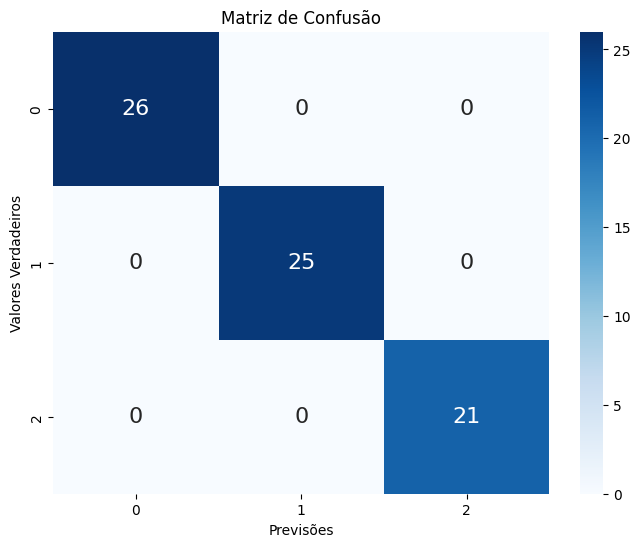

Acurácia do modelo: 1.00


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

def knn_classification(X_train, y_train, X_test, k=3):

    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_test)

    return y_pred

y_pred = knn_classification(cj_desen, cj_desen['Class'], cj_test, k=3)

# Calcule a matriz de confusão
cm = confusion_matrix(cj_test['Class'], y_pred)
# Calcular a acurácia
accuracy = accuracy_score(cj_test['Class'], y_pred)

# Crie um heatmap para visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()


print(f'Acurácia do modelo: {accuracy:.2f}')